In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Reading GT

In [2]:
#file 25 gt;  veh speed, yaw, lateral velocity
gt_23 = open("../signals/data/signal dataset/veh_yaw_latt_23.txt").readlines()[1:]
tmp = [line.split(',')[1:]for line in gt_23]
ext_gt = []
for i in range(len(tmp)):
    ext_gt.append([abs(int(float(gt.strip()))) for gt in tmp[i]])
    
gt_23 = np.array(ext_gt)

In [3]:
#file 25 gt;  veh speed, yaw, lateral velocity
gt_25 = open("../signals/data/signal dataset/veh_yaw_latt_25.txt").readlines()[1:]
tmp = [line.split(',')[1:]for line in gt_25]
ext_gt = []
for i in range(len(tmp)):
    ext_gt.append([abs(int(float(gt.strip()))) for gt in tmp[i]])
    
gt_25 = np.array(ext_gt)

### Speed prediction for 23 file using winter NN, commaai NN, slam

In [4]:
nn_winter_23 = open("../speed_det/output/winter_unet_winterTest_23pred.txt").readlines()
nn_commaai_23 = open("../speed_det/output/speed_unet_commaai_23pred.txt").readlines()

slam_23 = open("../ORB_SLAM2/speed_pred_23.txt").readlines()
slam_23 = np.array([None if x.strip() == "None" else float(x.strip()) * 10 for x in slam_23])

In [5]:
nn_winter_23 = list(map(float, nn_winter_23))
nn_commaai_23 = list(map(float, nn_commaai_23))
#slam_23 = list(map(float, slam_23))

### Speed prediction for 25 file using NN

In [6]:
nn_winter_25 = open("../speed_det/output/sp_25pred.txt").readlines()
nn_winter_25 = [float(pred.strip()) for pred in nn_winter_25]

### Visualization

<Figure size 20000x18000 with 0 Axes>

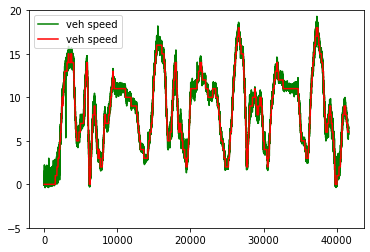

In [7]:
test_name = "nn_winter_25_speed"
plt.figure(figsize=(20, 18), dpi=1000)
fig = plt.figure()

#------------------23---------------------------------


#plt.plot(nn_commaai_23, 'b', label = 'nn trained on commai pred')
#plt.plot(slam_23, 'y', label = 'slam pred')
#plt.plot(nn_winter_23, 'g', label = 'nn trained on winter pred')

#plt.plot(gt_23[:,0], 'r', label = 'veh speed')


#------------------25---------------------------------

plt.plot(nn_winter_25, 'g', label = 'veh speed')
plt.plot(gt_25[:,0], 'r', label = 'veh speed')


plt.legend(loc="upper left")

#plt.xlim(10000, 20000)
plt.ylim(-5, 20)

fig.savefig("./graphs/{}.png".format(test_name), bbox_inches='tight', transparent=True,  dpi=1000)
plt.show()

# speed, yaw, latt, prediction 

In [8]:
pred_25 = open("./output/sp_yaw_latt_winter_25pred.txt").readlines()
tmp = [line.split(',') for line in pred_25]
pred_25 = []
for i in range(len(tmp)):
    pred_25.append([abs(int(float(prd.strip()))) for prd in tmp[i]])
    
pred_25 = np.array(pred_25)

In [9]:
pred_23 = open("./output/sp_yaw_latt_winter_23pred.txt").readlines()
tmp = [np.array(line.split(',')[:-1]) for line in pred_23]
pred_23 = []
for i in range(len(tmp)):
    pred_23.append([abs(int(float(prd.strip()))) for prd in tmp[i]])
    
pred_23 = np.array(pred_23)

<Figure size 20000x18000 with 0 Axes>

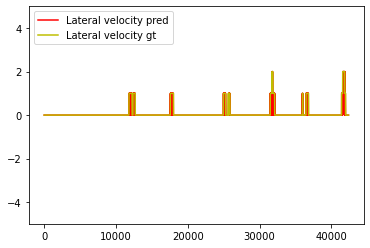

In [10]:
test_name = "latt23_Mhead"
plt.figure(figsize=(20, 18), dpi=1000)
fig = plt.figure()

#------------------25---------------------------------


#plt.plot(pred_25[:,0], 'g', label = 'Veh speed pred')
#plt.plot(pred_25[:,1], 'y', label = 'Yaw pred')
#plt.plot(pred_25[:,2], 'r', label = 'Lateral velocity pred')


#plt.plot(gt_25[:,0], 'r', label = 'Veh speed gt')
#plt.plot(gt_25[:,1], 'g', label = 'Yaw gt')
#plt.plot(gt_25[:,2], 'y', label = 'Lateral velocity gt')


#------------------23---------------------------------

#plt.plot(pred_23[:,0], 'g', label = 'Veh speed pred')
#plt.plot(pred_23[:,1], 'y', label = 'Yaw pred')
plt.plot(pred_23[:,2], 'r', label = 'Lateral velocity pred')


#plt.plot(gt_23[:,0], 'r', label = 'Veh speed gt')
#plt.plot(gt_23[:,1], 'g', label = 'Yaw gt')
plt.plot(gt_23[:,2], 'y', label = 'Lateral velocity gt')



plt.legend(loc = "upper left")

#plt.xlim(10000, 20000)
plt.ylim(-5, 5)

fig.savefig("./graphs/{}.png".format(test_name), bbox_inches='tight', transparent=True,  dpi=1000)
plt.show()